Classification Accuracy: 0.33
Output:
When we execute the above code, it produces the following result and chart –

Month  Year  Rainfall (mm)  Month_encoded
  Jan  2012          799.0              4
  Feb  2012         1174.8              3
  Mar  2012          865.1              7
  Apr  2012         1334.6              0
  May  2012          635.4              8
  Jun  2012          918.5              6
  Jul  2012          685.5              5
  Aug  2012          998.6              1
  Sep  2012          784.2             11
  Oct  2012          985.0             10
  Nov  2012          882.8              9
  Dec  2012         1071.0              2


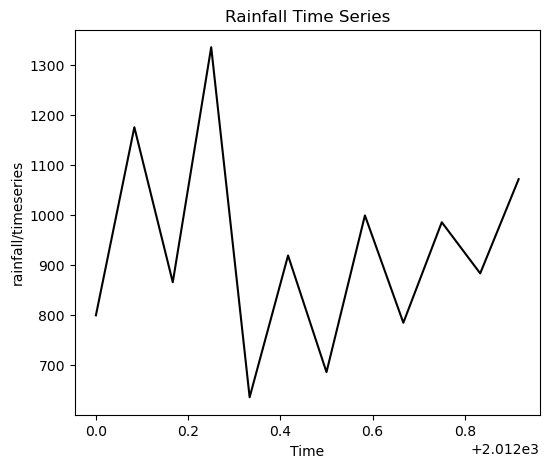

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Creating time series data
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
rainfall_values = [799.0, 1174.8, 865.1, 1334.6, 635.4, 918.5, 685.5, 998.6, 784.2, 985.0, 882.8, 1071.0]
time = np.arange(2012, 2013, 1/12)  # Monthly intervals for 2012

# Creating a DataFrame
df = pd.DataFrame({"Month": months, "Year": 2012, "Rainfall (mm)": rainfall_values})

# Encoding month names to numerical values
label_encoder = LabelEncoder()
df['Month_encoded'] = label_encoder.fit_transform(df['Month'])

# Defining features and labels
X = df[['Month_encoded']]
y = (df['Rainfall (mm)'] > np.mean(rainfall_values)).astype(int)  # Classify as high(1) or low(0) rainfall

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying classification model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Displaying accuracy
print(f'Classification Accuracy: {accuracy_score(y_test, y_pred):.2f}')

# Displaying data in tabular format
print("Output:")
print("When we execute the above code, it produces the following result and chart –\n")
print(df.to_string(index=False))  # Print table without index

# Creating a time series plot
plt.figure(figsize=(6, 5))
plt.plot(time, rainfall_values, marker='', linestyle='-', color='black')

# Labels
plt.xlabel("Time")
plt.ylabel("rainfall/timeseries")
plt.title("Rainfall Time Series")

# Show plot
plt.show()